# Introduzione

In questo primo esercizio studiamo la diversa efficacia di due metodi di integrazione Monte Carlo, ossia il sampling con una distribuzione uniforme e l'important sampling. Innanzitutto, il metodo Monte Carlo consiste nell'approssimare l'integrale come una media stocastica:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx= \int_0^1 h(x)f(x)dx = \langle h(x)\rangle \approx \frac{1}{N} \sum_{i=1}^N h(x_i) $$
dove la scelta della distribuzione di probabilità $f(x)$ determina il tipo di sampling.
* Il sampling con una **distribuzione uniforme** consiste nello scegliere:
$$\begin{cases}
f(x)=1 \\
h(x)= \frac{\pi}{2}\cos(\pi x/2)
\end{cases} \implies I\approx \frac{1}{N} \sum_{i=1}^N \frac{\pi}{2}\cos(\pi x_i/2)$$
dove $x_i$ è il risultato di un'estrazione da una distribuzione uniforme.
* L'**importance sampling** consiste nello scegliere una distribuzione di probabilità $f(x)$ che assomigli alla funzione h(x) così che i punti che contribuiscono maggiormente all'integrale di $h(x)$ vengano estratti con maggiore probabilità. La scelta che faccio per la funzione $f(x)$ è la seguente:
$$ f(x)= 2(1-x) \quad \rightarrow h(x)= \frac{\pi}{4}\frac{\cos(\pi x/2)}{1-x} $$
Faccio questa scelta particolare perchè questo consente di implementare facilmente un generatore di numeri random con tale distribuzione di probabilità attraverso il metodo della funzione caratteristica. Infatti la funzione cumulata per $f(x)$ è la funzione $F(x)=2\left(x-\frac{x^2}{2}\right)$ e la sua inversa è $F^{-1}(y)=1+\sqrt{1-y}$.




Per prima cosa mostro come la distribuzione di $x$ abbia la forma desiderata:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit
import seaborn as sns

sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
# Carico i dati dai file
file_int_unif= "Exercises_02.1/file_int_unif.txt"
file_int_importance = "Exercises_02.1/file_int_importance.txt"
file_verifica = "Exercises_02.1/verify.txt"

int_unif, std_int_unif = np.loadtxt(file_int_unif,delimiter = ",", unpack = True)
int_importance, std_int_importance = np.loadtxt(file_int_importance,delimiter = ",", unpack = True)
x_distribution = np.loadtxt(file_verifica)

number_throws = np.shape(int_unif)[0]

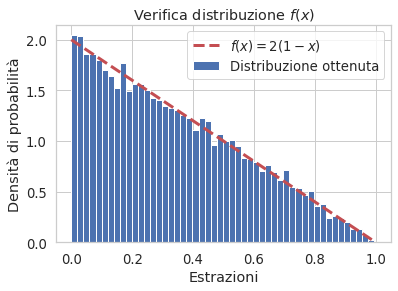

In [3]:
#Verifico, prima di procedere, che la distribuzione che ottengo per gli x_i sia quella attesa

n, bins, patches =plt.hist(x_distribution,50,density=True,label='Distribuzione ottenuta');
def func(x):
    return 2*(1-x)

y = func(np.linspace(0, 1, num=50))


plt.plot(np.linspace(0, 1, num=50), y, 'r--', linewidth=3, label=r'$f(x)=2(1-x)$')
plt.title(f"Verifica distribuzione $f(x)$",  );
plt.xlabel(r"Estrazioni")
plt.ylabel(r"Densità di probabilità" ,  )
plt.legend(frameon=True)
plt.grid(True)

> Questo ci garantisce che stiamo generando numeri correttamente distribuiti

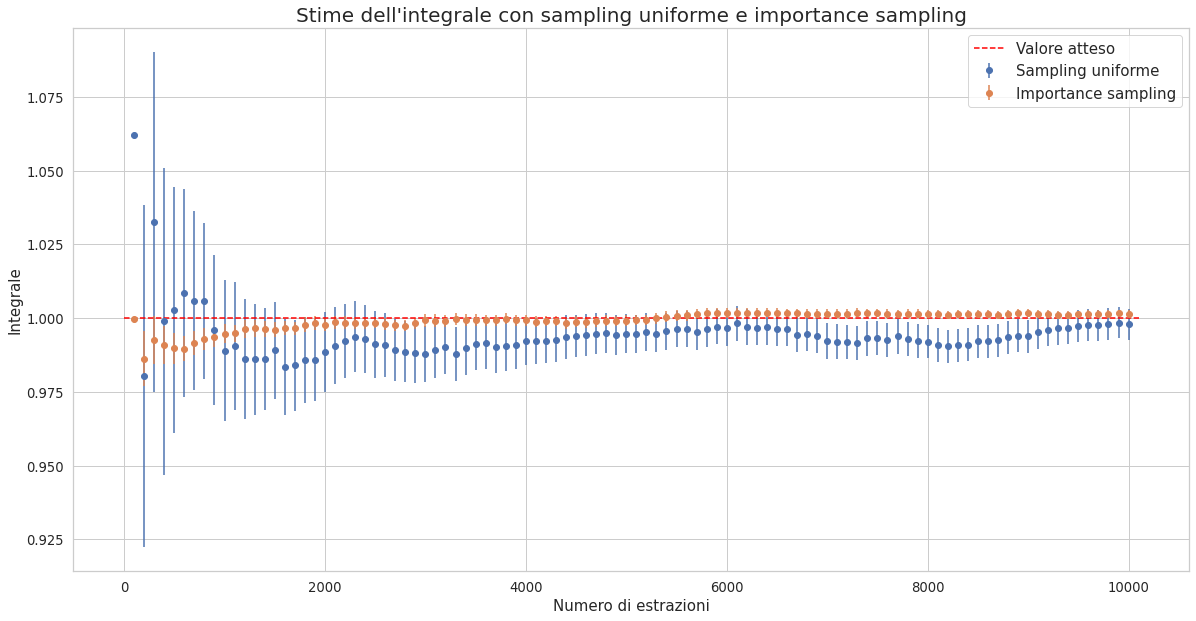

In [4]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,10));

ax1.errorbar(
    np.arange(1,(number_throws+1))*100,
    int_unif,
    yerr = std_int_unif,  
    marker='o', linestyle="", label='Sampling uniforme'
);

ax1.errorbar(
    np.arange(1,(number_throws+1))*100,
    int_importance,
    yerr = std_int_importance,  
    marker='o', linestyle="", label=r'Importance sampling'
);

ax1.hlines(1,0,(number_throws+1)*100, colors='red', linestyle='--', label='Valore atteso');
ax1.grid(True);

ax1.set_title(f"Stime dell'integrale con sampling uniforme e importance sampling",  fontsize=20);

ax1.set_xlabel(r"Numero di estrazioni",  fontsize=15);
ax1.set_ylabel(r"Integrale" ,  fontsize=15);
ax1.legend(frameon=True,prop={'size': 15});

> Osserviamo che effettivamente l'utilizzo della tecnica dell'importance sampling ci permette di covergere molto prima al valore atteso e con'un incertezza minore rispetto al sampling uniforme.